## Imports 

In [1]:
## Standard Libraries
import numpy as np
import pandas as pd

## Plotting 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Read csv on github
## The function input requires the raw data url 
HFlight_DF = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/hflights.csv")

In [3]:
## Display HFlight data set
HFlight_DF.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,...,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,...,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0


In [4]:
## Check for null values
HFlight_DF.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                2905
ArrTime                3066
UniqueCarrier             0
FlightNum                 0
TailNum                 795
ActualElapsedTime      3622
AirTime                3622
ArrDelay               3622
DepDelay               2905
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 3066
TaxiOut                2947
Cancelled                 0
CancellationCode     224523
Diverted                  0
dtype: int64

In [42]:
## Remove null values
# HFlight_DF = HFlight_DF.dropna()

In [5]:
## Print amount of unique carriers using unique function
Unique_Carriers = HFlight_DF["UniqueCarrier"].unique()
print(Unique_Carriers)

['AA' 'AS' 'B6' 'CO' 'DL' 'OO' 'UA' 'US' 'WN' 'EV' 'F9' 'FL' 'MQ' 'XE'
 'YV']


In [6]:
## Drop null values in DepDelay and Unique Carrier
HFlight_temp = HFlight_DF.dropna(subset=["DepDelay", "UniqueCarrier"])
## Filter dataframe rows for DepDelay values less than 60mins
HFlight_filtered = HFlight_temp[HFlight_temp["DepDelay"] < 60]

In [7]:
## Group by Unique Carrier, Take Dep Delay column and obtain mean values
average_DepDelay = HFlight_filtered.groupby("UniqueCarrier")["DepDelay"].mean()
print(average_DepDelay)

UniqueCarrier
AA    1.898862
AS    1.188732
B6    1.622549
CO    5.082625
DL    2.417542
EV    1.460195
F9    1.703106
FL   -0.304028
MQ    2.648315
OO    3.728818
UA    4.604797
US   -1.436849
WN    8.139336
XE    2.634186
YV    1.538462
Name: DepDelay, dtype: float64


In [8]:
## Reset group by index
average_DepDelay = average_DepDelay.reset_index()

In [9]:
## Display average departure delay per carrier
print(average_DepDelay)

   UniqueCarrier  DepDelay
0             AA  1.898862
1             AS  1.188732
2             B6  1.622549
3             CO  5.082625
4             DL  2.417542
5             EV  1.460195
6             F9  1.703106
7             FL -0.304028
8             MQ  2.648315
9             OO  3.728818
10            UA  4.604797
11            US -1.436849
12            WN  8.139336
13            XE  2.634186
14            YV  1.538462


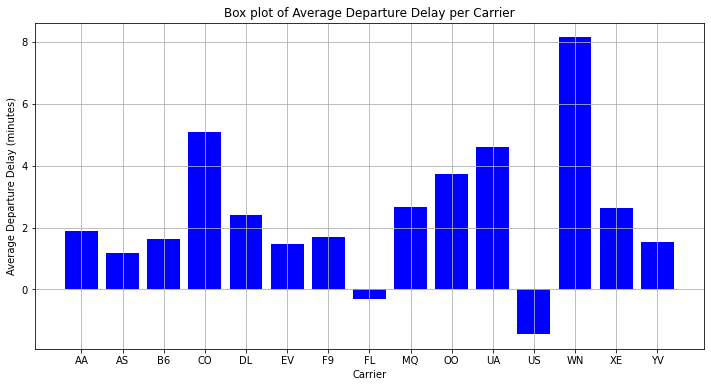

In [10]:
# Create a boxplot

plt.figure(figsize=(12, 6))
plt.bar(average_DepDelay["UniqueCarrier"], average_DepDelay["DepDelay"], color="blue", label="Bar Plot")
plt.title("Box plot of Average Departure Delay per Carrier")
plt.xlabel("Carrier")
plt.ylabel("Average Departure Delay (minutes)")
plt.grid(True)
plt.show()

From the departure delay data we observe that the best airline carrier was US due to the lowest average departure delay of -1.46 minutes indicating an average early departure. The worst performing airline carrier was WN with an average departure delay of 8.14 minutes 

## Determining median values between WN and US

In [64]:
# ## Filter HFlight_temp dataframe unique carrier values to WN and US
# HFlight_temp_2 = HFlight_temp[HFlight_temp["UniqueCarrier"].isin(["WN, US"])]
# ## Filter departure delay to below 60mins
# HFlight_filtered = HFlight_temp_2[HFlight_temp_2["DepDelay"] < 60]
# ## Group by Unique Carrier and obtain median departure delay
# Median_DepDelay = HFlight_filtered.groupby("UniqueCarrier")["DepDelay"].median()

In [65]:
# print(Median_DepDelay)

Series([], Name: DepDelay, dtype: float64)


In [13]:
## Filter HFlight_temp dataframe unique carrier values to WN
HFlight_temp_3 = HFlight_temp[HFlight_temp["UniqueCarrier"] == "WN"]
## Filter departure delay to below 60mins
HFlight_filtered = HFlight_temp_3[HFlight_temp_3["DepDelay"] < 60]
## Group by Unique Carrier and obtain median departure delay
Median_DepDelay = HFlight_filtered.groupby("UniqueCarrier")["DepDelay"].median()

print(f"WN median departure delay is {Median_DepDelay[0]} minutes")

WN median departure delay is 3.0 minutes


In [15]:
## Filter HFlight_temp dataframe unique carrier values to US
HFlight_temp_4 = HFlight_temp[HFlight_temp["UniqueCarrier"] == "US"]
## Filter departure delay to below 60mins
HFlight_filtered = HFlight_temp_4[HFlight_temp_4["DepDelay"] < 60]
## Group by Unique Carrier and obtain median departure delay
Median_DepDelay = HFlight_filtered.groupby("UniqueCarrier")["DepDelay"].median()

print(f"WN median departure delay is {Median_DepDelay[0]} minutes i.e. Early Departure of 4 mins")

WN median departure delay is -4.0 minutes
